In [10]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt

9
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 

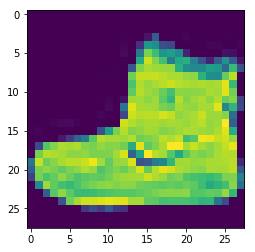

In [13]:
mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train[0])
print(x_train[0])
plt.imshow(x_train[0])

In [16]:
#normalizing data
x_train=x_train/225.0
x_test=x_test/255.0

In [28]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer = tf.train.AdamOptimizer(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 9s 152us/sample - loss: 0.8250 - acc: 0.7264
Epoch 2/5
60000/60000 [==============================] - 9s 148us/sample - loss: 0.5250 - acc: 0.8127
Epoch 3/5
60000/60000 [==============================] - 9s 147us/sample - loss: 0.4716 - acc: 0.8328
Epoch 4/5
60000/60000 [==============================] - 9s 149us/sample - loss: 0.4430 - acc: 0.8426
Epoch 5/5
60000/60000 [==============================] - 9s 150us/sample - loss: 0.4233 - acc: 0.8505


In [29]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 65us/sample - loss: 0.4880 - acc: 0.8285


[0.48799978618621825, 0.8285]

In [48]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=2, callbacks=[callbacks])

1.13.1
Epoch 1/2
60000/60000 [==============================] - 18s 293us/sample - loss: 0.4724
Epoch 2/2
59872/60000 [============================>.] - ETA: 0s - loss: 0.3592
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 17s 287us/sample - loss: 0.3591
